# **Problem statement**
Students often complain that a test is too difficult. Are there tests that are more difficult than others? And if there are, was it because the material was harder, the test was more difficult, or the students just didn't do as well on the exam? It is difficult to ascertain the reasons why students do better on one exam or worse on another, but we can determine if they actually do better or worse on some exams if they do the same on all the exams. Another claim that has often been made is that women do worse in mathematics than men. Is this just a stereotype, or is there actual Statistical evidence to support this claim?

**Project requirement**
You are required to design and run statistical analysis using Python, to answer the following questions (please read the following questions carefully):
1. Which exact exam is the most challenging exam for male students?
2. In general, which type of exam is the easier for all the students?
3. Comparing to math exam, whether female students do better in the history exam than male?


To answer these questions,I will employ two aproaches. First, a descriptive statistical analysis to understand the destribution of the data better and be able to make a guess and second, a proper inferential statistical analysis that would involve some hypothesis testing. I will use Python for this analysis

***First off, Descriptive Statistics***

In [ ]:
# First,importing the necessary libraries for data manipulation, plotting and analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)

import warnings
warnings.filterwarnings('ignore')

<ipython-input-1-cd6f7af6f69d>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [ ]:
df = pd.read_csv('sample_data/Dataset+W23.csv')
df.head()

,Math Exam 1,Sex,Math Exam 2,Sex.1,Math Exam 3,Sex.2,Math Exam 4,Sex.3,History Exam 1,Sex.4,History Exam 2,Sex.5,History Exam 3,Sex.6,History Exam 4,Sex.7
0,45,m,66,f,66,f,61,m,74,f,61,m,60,f,65,f
1,60,m,73,m,66,m,63,m,75,m,62,f,67,m,65,f
2,63,m,75,f,67,f,69,m,76,m,67,f,72,m,77,f
3,67,m,75,f,70,f,71,f,78,f,75,f,75,m,77,m
4,67,m,75,m,73,m,74,f,80,m,78,f,76,f,78,f


**Rename the column to look better. Pnadas appended .1,.2, etc to sex to avoid duplicate column names**

In [ ]:
df.rename(columns=
          {'Sex': 'Sex1', 'Sex.1': 'Sex2', 'Sex.2': 'Sex3', 'Sex.3': 'Sex4', 'Sex.4': 'Sex5', 'Sex.5': 'Sex6', 'Sex.6':'Sex7', 'Sex.7': 'Sex8'
           }, inplace=True
          )
df.columns

Index(['Math Exam 1', 'Sex1', 'Math Exam 2', 'Sex2', 'Math Exam 3', 'Sex3',
       'Math Exam 4', 'Sex4', 'History Exam 1', 'Sex5', 'History Exam 2',
       'Sex6', 'History Exam 3', 'Sex7', 'History Exam 4', 'Sex8'],
      dtype='object')

**Check for null values**

In [ ]:
df.isnull().sum()

Math Exam 1       0
Sex1              0
Math Exam 2       0
Sex2              0
Math Exam 3       0
Sex3              0
Math Exam 4       0
Sex4              0
History Exam 1    0
Sex5              0
History Exam 2    0
Sex6              0
History Exam 3    0
Sex7              0
History Exam 4    0
Sex8              0
dtype: int64

**Now, let's get some general dscription of the data**

In [ ]:
df.describe()

,Math Exam 1,Math Exam 2,Math Exam 3,Math Exam 4,History Exam 1,History Exam 2,History Exam 3,History Exam 4
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,69.642857,78.357143,76.357143,76.214286,81.285714,82.785714,79.000000,82.714286
std,9.524116,5.386695,6.890430,8.078257,4.462296,12.423170,8.439832,9.603113
min,45.000000,66.000000,66.000000,61.000000,74.000000,61.000000,60.000000,65.000000
25%,67.000000,75.000000,70.750000,71.750000,78.500000,75.750000,75.250000,77.250000
50%,71.000000,78.000000,78.000000,77.000000,81.500000,85.500000,81.000000,85.000000
75%,75.750000,83.000000,82.500000,83.000000,83.750000,93.000000,85.750000,90.750000
max,82.000000,86.000000,85.000000,86.000000,89.000000,96.000000,88.000000,93.000000


**1. Which exact exam is the most challenging exam for male students?**

**Let's perform somedata cleaning to extract only that exam scores for male students alone**

In [ ]:

S1 = df[df['Sex1'] == 'm'][['Math Exam 1']]
S2 = df[df['Sex2'] == 'm'][['Math Exam 2']]
S3 = df[df['Sex3'] == 'm'][['Math Exam 3']]
S4 = df[df['Sex4'] == 'm'][['Math Exam 4']]
S5 = df[df['Sex5'] == 'm'][['History Exam 1']]
S6 = df[df['Sex6'] == 'm'][['History Exam 2']]
S7 = df[df['Sex7'] == 'm'][['History Exam 3']]
S8 = df[df['Sex8'] == 'm'][['History Exam 4']]

male_df = pd.concat([S1,S2,S3,S4,S5,S6,S7,S8], axis=1)
male_df



,Math Exam 1,Math Exam 2,Math Exam 3,Math Exam 4,History Exam 1,History Exam 2,History Exam 3,History Exam 4
0,45.0,NaN,NaN,61.0,NaN,61.0,NaN,NaN
1,60.0,73.0,66.0,63.0,75.0,NaN,67.0,NaN
2,63.0,NaN,NaN,69.0,76.0,NaN,72.0,NaN
3,67.0,NaN,NaN,NaN,NaN,NaN,75.0,77.0
4,67.0,75.0,73.0,NaN,80.0,NaN,NaN,NaN
7,73.0,NaN,NaN,77.0,NaN,88.0,NaN,86.0
12,80.0,83.0,84.0,NaN,87.0,NaN,NaN,NaN
6,NaN,77.0,78.0,NaN,81.0,83.0,79.0,NaN
8,NaN,82.0,80.0,NaN,82.0,93.0,83.0,87.0
10,NaN,83.0,83.0,83.0,NaN,NaN,NaN,91.0


The extracted male data has NAN at the cells where female scores were. let's cleanit up to remove those NAN values

In [ ]:

male_df = (male_df.apply(lambda x: pd.Series(x.dropna().values), axis=0)
         .fillna('')
       )
male_df


,Math Exam 1,Math Exam 2,Math Exam 3,Math Exam 4,History Exam 1,History Exam 2,History Exam 3,History Exam 4
0,45.0,73.0,66.0,61.0,75.0,61.0,67.0,77.0
1,60.0,75.0,73.0,63.0,76.0,88.0,72.0,86.0
2,63.0,83.0,84.0,69.0,80.0,83.0,75.0,87.0
3,67.0,77.0,78.0,77.0,87.0,93.0,79.0,91.0
4,67.0,82.0,80.0,83.0,81.0,93.0,83.0,90.0
5,73.0,83.0,83.0,84.0,82.0,82.0,87.0,79.0
6,80.0,83.0,83.0,83.0,81.0,96.0,85.0,93.0


In [ ]:
male_df.isna().sum()

Math Exam 1       0
Math Exam 2       0
Math Exam 3       0
Math Exam 4       0
History Exam 1    0
History Exam 2    0
History Exam 3    0
History Exam 4    0
dtype: int64

The male data is now completedly cleaned as seen above. Now, we answer the question

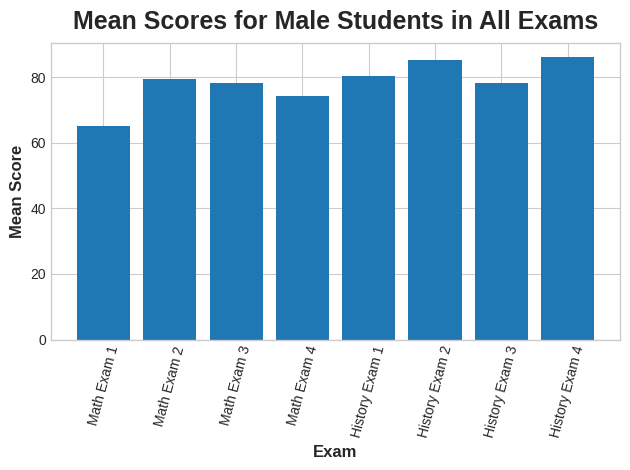

Math Exam 1       65.000000
Math Exam 2       79.428571
Math Exam 3       78.142857
Math Exam 4       74.285714
History Exam 1    80.285714
History Exam 2    85.142857
History Exam 3    78.285714
History Exam 4    86.142857
dtype: float64


In [ ]:
# calculate mean score for each exam by male students
male_mean = male_df.mean()

# plot the results
plt.bar(['Math Exam 1', 'Math Exam 2', 'Math Exam 3', 'Math Exam 4', 'History Exam 1', 'History Exam 2', 'History Exam 3', 'History Exam 4'], male_mean)
plt.title('Mean Scores for Male Students in All Exams')
plt.xlabel('Exam')
plt.ylabel('Mean Score')
plt.xticks(rotation=75)
plt.show()
# Print the mean scores for each exam
print(male_mean)

From the above, we can see that male students scored the lowest in Math Exam 1. **Hence Math Exam 1 is the most challenging for male students.** In addition to answering the question,we can check between Math and History exams,which of them is more difficult to male by aggregating the scores for the two exams as follows

Male mean in Math: 74.21428571428572
Male mean in History: 82.46428571428572


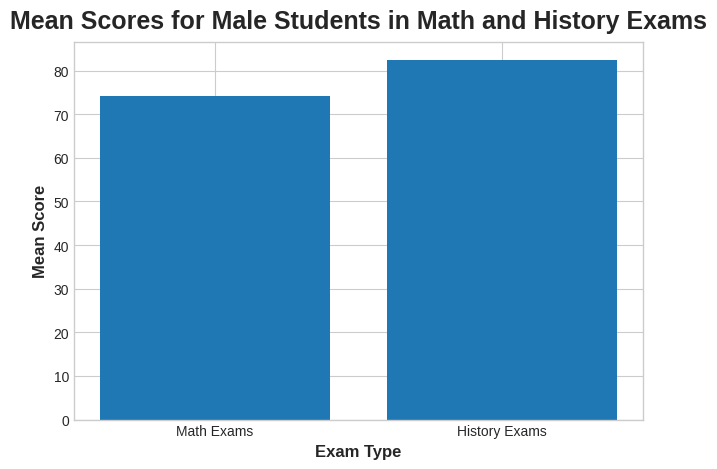

In [ ]:
# calculate mean score for Math and History exams by male students
male_math_mean = male_df[['Math Exam 1', 'Math Exam 2', 'Math Exam 3', 'Math Exam 4']].mean().mean()
male_history_mean = male_df[['History Exam 1', 'History Exam 2', 'History Exam 3', 'History Exam 4']].mean().mean()

print(f'Male mean in Math: {male_math_mean}')
print(f'Male mean in History: {male_history_mean}')

# plot the results
plt.bar(['Math Exams', 'History Exams'], [male_math_mean, male_history_mean])
plt.title('Mean Scores for Male Students in Math and History Exams')
plt.xlabel('Exam Type')
plt.ylabel('Mean Score')
plt.show()


In addition,from the above, we see that male generally scored lower in Math than in History.

In [ ]:
male_math_std = male_df[['Math Exam 1', 'Math Exam 2', 'Math Exam 3', 'Math Exam 4']].std().mean()
male_history_std = male_df[['History Exam 1', 'History Exam 2', 'History Exam 3', 'History Exam 4']].std().mean()

print(f'Male mean in Math: {male_math_std}')
print(f'Male mean in History: {male_history_std}')


Male mean in Math: 7.94028169658046
Male mean in History: 7.3136923082765515


In [ ]:
male_std = df.groupby('Sex1').std().T['m']
print(male_std)

Math Exam 1       11.000000
Math Exam 2        5.241774
Math Exam 3        6.855655
Math Exam 4        8.521681
History Exam 1     4.561746
History Exam 2    12.701706
History Exam 3     9.396048
History Exam 4    10.209706
Name: m, dtype: float64


From the standard deviations above, we can see how the scores in each exact exam are spread out

**2. In general, which type of exam is the easier for all the students?**

This can be answered using the mean score for all the students in either math or history exam type.

In [ ]:
# First, let me separate the data into relevant sub-datasets

math_df = df[['Math Exam 1', 'Sex1', 'Math Exam 2', 'Sex2', 'Math Exam 3', 'Sex3', 'Math Exam 4', 'Sex4']]
history_df = df[['History Exam 1', 'Sex5', 'History Exam 2', 'Sex6', 'History Exam 3', 'Sex7', 'History Exam 4', 'Sex8']]

Math Mean: 75.14285714285714
History Mean: 81.44642857142857


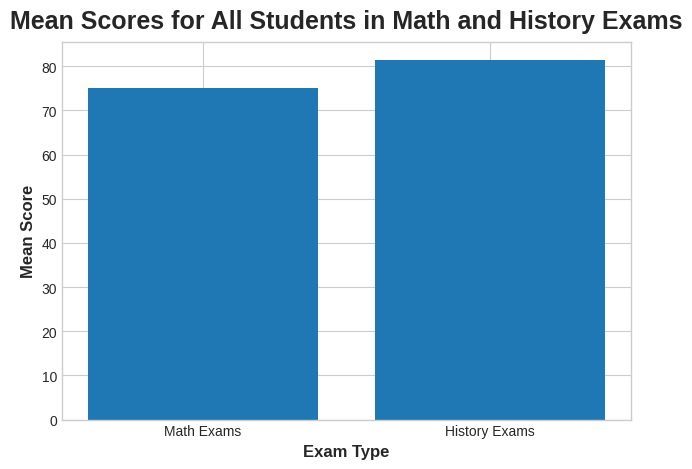

In [ ]:
# calculate mean score for each exam by all students
math_mean = math_df.mean().mean()
history_mean = history_df.mean().mean()
print(f'Math Mean: {math_mean}')
print(f'History Mean: {history_mean}')

# confirm with plot also
plt.bar(['Math Exams', 'History Exams'], [math_mean, history_mean])
plt.title('Mean Scores for All Students in Math and History Exams')
plt.xlabel('Exam Type')
plt.ylabel('Mean Score')
plt.show()

Therefore, History is generally easier than Math for all students.

**3. Comparing to math exam, whether female students do better in the history exam than male?**

In [ ]:
f1 = df[df['Sex1'] == 'f'][['Math Exam 1']]
f2 = df[df['Sex2'] == 'f'][['Math Exam 2']]
f3 = df[df['Sex3'] == 'f'][['Math Exam 3']]
f4 = df[df['Sex4'] == 'f'][['Math Exam 4']]
f5 = df[df['Sex5'] == 'f'][['History Exam 1']]
f6 = df[df['Sex6'] == 'f'][['History Exam 2']]
f7 = df[df['Sex7'] == 'f'][['History Exam 3']]
f8 = df[df['Sex8'] == 'f'][['History Exam 4']]

female_df = pd.concat([f1,f2,f3,f4,f5,f6,f7,f8], axis=1)

female_df = (female_df.apply(lambda x: pd.Series(x.dropna().values), axis=0)
         .fillna('')
       )
female_df


,Math Exam 1,Math Exam 2,Math Exam 3,Math Exam 4,History Exam 1,History Exam 2,History Exam 3,History Exam 4
0,67.0,77.0,75.0,74.0,83.0,93.0,77.0,84.0
1,69.0,83.0,81.0,77.0,84.0,94.0,86.0,93.0
2,74.0,86.0,85.0,79.0,86.0,67.0,88.0,65.0
3,75.0,66.0,66.0,86.0,89.0,75.0,60.0,77.0
4,76.0,75.0,67.0,71.0,74.0,78.0,83.0,78.0
5,77.0,75.0,70.0,74.0,78.0,94.0,76.0,93.0
6,82.0,79.0,78.0,86.0,82.0,62.0,88.0,65.0


In [ ]:
female_df.isna().sum()

Math Exam 1       0
Math Exam 2       0
Math Exam 3       0
Math Exam 4       0
History Exam 1    0
History Exam 2    0
History Exam 3    0
History Exam 4    0
dtype: int64

In [ ]:
# calculate mean score for each exam by male and female students separately
math_male_df = male_df[['Math Exam 1', 'Math Exam 2', 'Math Exam 3', 'Math Exam 4']]
math_female_df = female_df[['Math Exam 1', 'Math Exam 2', 'Math Exam 3', 'Math Exam 4']]
history_male_df = male_df[['History Exam 1', 'History Exam 2', 'History Exam 3', 'History Exam 4']]
history_female_df = female_df[['History Exam 1', 'History Exam 2', 'History Exam 3', 'History Exam 4']]

math_male_mean = math_male_df.mean().mean()
math_female_mean = math_female_df.mean().mean()
history_male_mean = history_male_df.mean().mean()
history_female_mean = history_female_df.mean().mean()

# calculate the stds as well
math_male_std = math_male_df.std().mean()
math_female_std = math_female_df.std().mean()
history_male_std = history_male_df.std().mean()
history_female_std = history_female_df.std().mean()



# Print the scores
print(f'Math Male Mean: {math_male_mean}')
print(f'Math Female Mean: {math_female_mean}')
print(f'History Male Mean: {history_male_mean}')
print(f'History Female Mean: {history_female_mean}')

print()
# Compare the performance of female students in history exams with respect to male students in math exams
if history_female_mean > math_male_mean:
    print("Female students perform better in history exams than male students in math exams.")
else:
    print("There is no evidence to suggest that female students perform better in history exams than male students in math exams.")


Math Male Mean: 74.21428571428572
Math Female Mean: 76.07142857142858
History Male Mean: 82.46428571428572
History Female Mean: 80.42857142857143

Female students perform better in history exams than male students in math exams.


**This answers question 3,and we can also confirm this with the plot below**

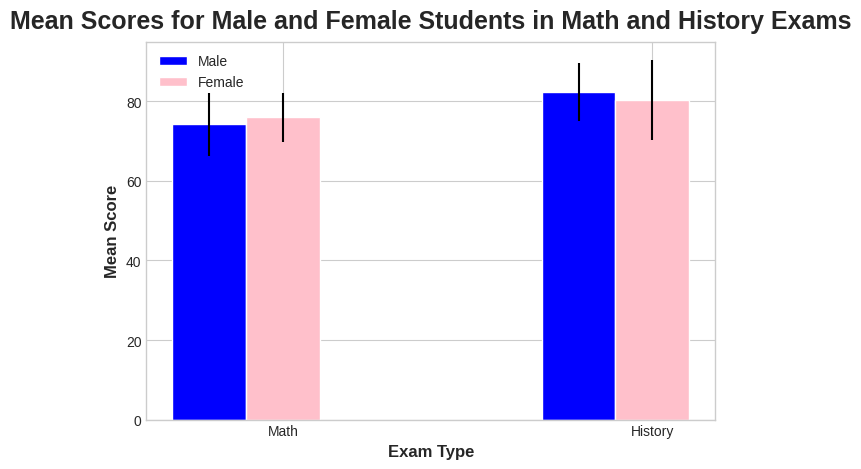

In [ ]:
# plot the results
barWidth = 0.2
r1 = np.arange(2)
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

plt.bar(r1, [math_male_mean, history_male_mean], color='blue', width=barWidth, edgecolor='white', label='Male')
plt.bar(r2, [math_female_mean, history_female_mean], color='pink', width=barWidth, edgecolor='white', label='Female')
plt.errorbar(r1, [math_male_mean, history_male_mean], yerr=[math_male_std, history_male_std], fmt='none', ecolor='black')
plt.errorbar(r2, [math_female_mean, history_female_mean], yerr=[math_female_std, history_female_std], fmt='none', ecolor='black')
plt.xticks([r + barWidth for r in range(2)], ['Math', 'History'])
plt.title('Mean Scores for Male and Female Students in Math and History Exams')
plt.xlabel('Exam Type')
plt.ylabel('Mean Score')
plt.legend()
plt.show()


In addition to answering question 3, we can plot the distribution of male and female students across all the 8 exams as follows

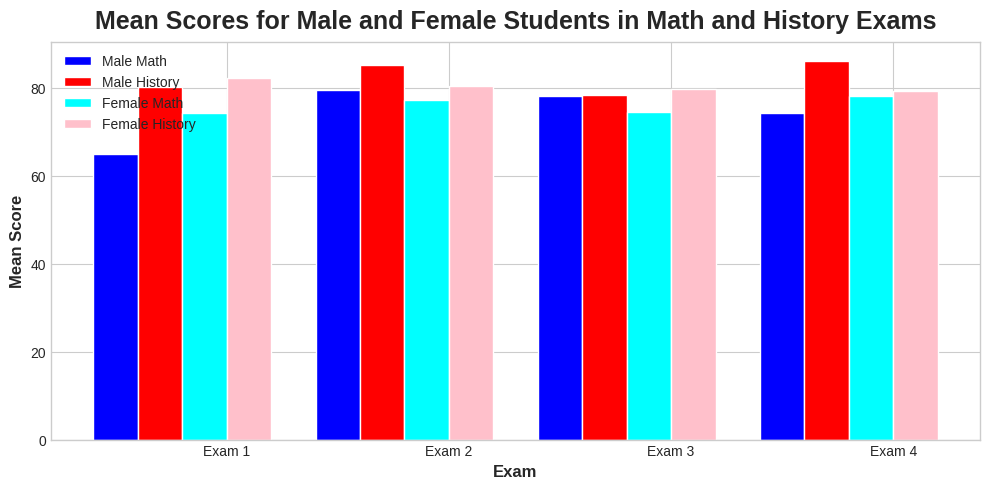

In [ ]:
# calculate mean score for each exam by male and female students separately
math_male_mean = math_male_df.mean()
math_female_mean = math_female_df.mean()
history_male_mean = history_male_df.mean()
history_female_mean = history_female_df.mean()

# plot the results
barWidth = 0.2
r1 = np.arange(len(math_male_mean))
r2 = [x + barWidth for x in r1]
plt.figure(figsize=(10,5))
plt.bar(r1, math_male_mean, color='blue', width=barWidth, edgecolor='white', label='Male Math')
plt.bar(r2, history_male_mean, color='red', width=barWidth, edgecolor='white', label='Male History')
plt.xticks([r + barWidth/2 for r in range(len(math_male_mean))], ['Exam 1', 'Exam 2', 'Exam 3', 'Exam 4'])
plt.title('Mean Scores for Male Students in Math and History Exams')
plt.xlabel('Exam')
plt.ylabel('Mean Score')
plt.legend()

r3 = [x + barWidth*2 for x in r1]
r4 = [x + barWidth for x in r3]
plt.bar(r3, math_female_mean, color='cyan', width=barWidth, edgecolor='white', label='Female Math')
plt.bar(r4, history_female_mean, color='pink', width=barWidth, edgecolor='white', label='Female History')
plt.xticks([r + barWidth/2 + barWidth*2 for r in range(len(math_male_mean))], ['Exam 1', 'Exam 2', 'Exam 3', 'Exam 4'])
plt.title('Mean Scores for Male and Female Students in Math and History Exams')
plt.xlabel('Exam')
plt.ylabel('Mean Score')
plt.legend()
plt.show()


# **Answering with more confidence using Inferential Statistics**

. **1. Which exact exam is the most challenging exam for male students?**

To answer this question, we will setup a statiical test of hypothesis as follows:


**H0 (Null Hypothesis):** the mean scores of male students are the same across all exams

against

**H1(Alternative hypothesis):** there are significant differences in mean scores between at least two exams.

Let the level of sigmificance, **α = 0.05**

**Decision rule:** we reject the null hypothesis if the p-value is less than α and conclude that there are significant differences in mean scores between exams. If the p-value is greater than α, we fail to reject the null hypothesis and conclude that there are no significant differences in mean scores between exams

We will use a one-way analysis of variance (ANOVA) for our test statistic. If there is a significant difference, we then perform a post-hoc test to determine which exact exam with the lowest mean for male students


In [ ]:
import pandas as pd
from scipy.stats import f_oneway


# extract the math exam scores for male students
math_male = math_male_df.values.reshape(-1)

# extract the history exam scores for male students
history_male = history_male_df.values.reshape(-1)

print(f'Math Male: {math_male}')
print(f'History Male: {history_male}')

# perform one-way ANOVA
f_val, p_val = f_oneway(math_male, history_male)

# print the results
print('\n\nOne-way ANOVA results:')
print('-----------------------')
print('F-value:', f_val)
print('p-value:', p_val)


Math Male: [45. 73. 66. 61. 60. 75. 73. 63. 63. 83. 84. 69. 67. 77. 78. 77. 67. 82.
 80. 83. 73. 83. 83. 84. 80. 83. 83. 83.]
History Male: [75. 61. 67. 77. 76. 88. 72. 86. 80. 83. 75. 87. 87. 93. 79. 91. 81. 93.
 83. 90. 82. 82. 87. 79. 81. 96. 85. 93.]


One-way ANOVA results:
-----------------------
F-value: 11.802532952134413
p-value: 0.0011446226224956977


Conclusion: since the p-value = 0.001 is less than α = 0.05, we reject the null hypothesis and conclude that there exist some significant difference between atleast two exams.

**Let's perfom a Turkey post-hoc test.**

In [ ]:
male_df_turkey = male_df.copy()

#convert the dataframe to a series
male_df_turkey = male_df_turkey.stack()

# reset the index and make the second level index a column
male_df_turkey = male_df_turkey.reset_index(level=1)

# rename the column
male_df_turkey = male_df_turkey.rename(columns={'level_1': 'Column'})

# sort the series by the 'Column' column
male_df_turkey = male_df_turkey.sort_values('Column')

male_df_turkey.columns = ['Exam type', 'Score']

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd


# perform Tukey's test
tukey = pairwise_tukeyhsd(endog=male_df_turkey['Score'],
                          groups=male_df_turkey['Exam type'],
                          alpha=0.05)

#display results
print(tukey)


         Multiple Comparison of Means - Tukey HSD, FWER=0.05         
    group1         group2     meandiff p-adj   lower    upper  reject
---------------------------------------------------------------------
History Exam 1 History Exam 2   4.8571 0.9495   -8.898 18.6123  False
History Exam 1 History Exam 3     -2.0 0.9998 -15.7551 11.7551  False
History Exam 1 History Exam 4   5.8571  0.875   -7.898 19.6123  False
History Exam 1    Math Exam 1 -15.2857 0.0198 -29.0408 -1.5306   True
History Exam 1    Math Exam 2  -0.8571    1.0 -14.6123  12.898  False
History Exam 1    Math Exam 3  -2.1429 0.9996  -15.898 11.6123  False
History Exam 1    Math Exam 4     -6.0 0.8609 -19.7551  7.7551  False
History Exam 2 History Exam 3  -6.8571 0.7598 -20.6123   6.898  False
History Exam 2 History Exam 4      1.0    1.0 -12.7551 14.7551  False
History Exam 2    Math Exam 1 -20.1429 0.0007  -33.898 -6.3877   True
History Exam 2    Math Exam 2  -5.7143 0.8882 -19.4694  8.0408  False
History Exam 2    Ma

As we can see from the Turkey's test above,most of the exam pairs showed no significant difference. Out of the few that are significatly different, all have Math Exam 1 in pair. Hence, we can conclude that again, same with descriptive statistics result, **Math Exam 1 is the most challenging fo male students.**

**2. In general, which type of exam is the easier for all the students?**

To answer this question, we will setup a statiical test of hypothesis as before:


**H0 (Null Hypothesis):** their is no difference in the mean performance of students in Math and History exams

against

**H1(Alternative hypothesis):** there are significant differences in mean performance between the two groups(Math and History).

Let the level of sigmificance, **α = 0.05**

**Decision rule:** we reject the null hypothesis if the p-value is less than α and conclude that there are significant differences in mean performance ofstudents between Math and Histor. If the p-value is greater than α, we fail to reject the null hypothesis and conclude that there is no significant differences in the mean performance of students in the two subjects

We will use a two-sample t-test to check for the difference in mean in the two groups.

PS: In answering the questions in this project, we assume that the data met all the conditionals for the type of test we perform.

In [ ]:
math_scores = df[['Math Exam 1', 'Math Exam 2', 'Math Exam 3', 'Math Exam 4']]
history_scores = df[['History Exam 1', 'History Exam 2', 'History Exam 3', 'History Exam 4']]

In [ ]:
from scipy.stats import ttest_ind

# Select the Math and History exam columns
math_scores = math_scores.values.flatten()
history_scores = history_scores.values.flatten()

# Conduct the two-sample t-test
t_stat, p_val = ttest_ind(math_scores, history_scores)

# Print the results
print("The t-statistic is: ", t_stat)
print("The p-value is: ", p_val)


The t-statistic is:  -3.8754127806403758
The p-value is:  0.00018135119484549538


Conclusion: since the p-value = 0.0001 is less than α = 0.05, we reject the null hypothesis and conclude that there exist some significant difference in students' performance between the two subjects (Math and History).

Now that we're certain that the two subjects show significant difference performance among students using two-sample t-test, we can calculate Cohen's d, which is a standardized measure of the difference between two means, adjusted for the standard deviation to answer the question using the adjsuted mean. Wecan as well conduct a post-hoc test to check this.

If we do Math - History, then a positive value of Cohen's d would indicate that Math exams have higher mean value, hence, are easier for all students, while a negative value of Cohen's d would indicate that History exams are easier for all students. The magnitude of the effect size would also indicate how much easier one exam is compared to the other.

In [ ]:
# Calculate the mean scores for each group
math_mean = np.mean(math_scores)
history_mean = np.mean(history_scores)

# Calculate the effect size using Cohen's d
math_var = np.var(math_scores, ddof=1)
history_var = np.var(history_scores, ddof=1)
pooled_std = np.sqrt((math_var + history_var) / 2)
cohens_d = (math_mean - history_mean) / pooled_std

# Print the results
print("The mean score for Math exams is: ", math_mean)
print("The mean score for History exams is: ", history_mean)
print("The effect size (Cohen's d) is: ", cohens_d)


The mean score for Math exams is:  75.14285714285714
The mean score for History exams is:  81.44642857142857
The effect size (Cohen's d) is:  -0.7323841746639818


From the result above, we can conclude that **History exams are generally easier for all students with a factor of 0.7**

**3. Comparing to math exam, whether female students do better in the history exam than male?**

let's perform a two two-sample t-test to compare the mean scores of male and female in Math, then in History. To proceed to check fora significant difference as we did earlier.

First, for Math.

The null hypothesis is that there is no significant difference in the mean performance of male and female students in Math. The alternative hypothesis is that there is a significant difference in the mean performance of male and female students in Math Exams.

In [ ]:
# t-test for Math exam

math_ttest = ttest_ind(math_male_df.values.flatten(), math_female_df.values.flatten())
print("t-test result for Math exam:")
print(math_ttest)

t-test result for Math exam:
Ttest_indResult(statistic=-0.853594022056751, pvalue=0.39710067448423525)


Second,for History. The null hypothesis is that there is no significant difference in the mean performance of male and female students in History. The alternative hypothesis is that there is a significant difference in the mean performance of male and female students in History Exams.

In [ ]:
# t-test for History exam

history_ttest = ttest_ind(history_male_df.values.flatten(), history_female_df.values.flatten())
print("t-test result for History exams:")
print(history_ttest)

t-test result for History exams:
Ttest_indResult(statistic=0.8377690571555384, pvalue=0.40585322753373865)


Conclusin, since the p-value in both cases are greater than the level of significance which we assume to be 0.05, we do not reject the null hypothesis in both case (0.3971 for Math and 0.4585 for History) and conclude that there is no enough evidence to determine if Female students performbettr in History exam compared to male in math exams.

# **LIMITATIONS**

1. Small sample size for a more reliable generalization
2. It's difficult to make satisfactory statistical conclusions on students performance in exams with only the exams and gender. More independet variables that affects performance should be added.
3. The format of the original data made it very difficult and time-consuming for formatting before an appriopriate could be carried out.
